# Homework 5

## FINM 36700 - 2024

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

***

# Section 1: Harvard Case

*This section will not be graded, but it will be discussed in class.*

**Smart Beta Exchange-Traded-Funds and Factor Investing**.

* The case is a good introduction to important pricing factors.
* It also gives useful introduction and context to ETFs, passive vs active investing, and so-called “smart beta” funds.

1. Describe how each of the factors (other than MKT) is measured.1That is, each factor is a portfolio of stocks–which stocks are included in the factor portfolio?

2. Is the factor portfolio...
* long-only
* long-short
* value-weighted
* equally-weighted

4. What steps are taken in the factor construction to try to reduce the correlation between the factors?
5. What is the point of figures 1-6?
6. How is a “smart beta” ETF different from a traditional ETF?
7. Is it possible for all investors to have exposure to the “value” factor?
8. How does factor investing differ from traditional diversification?


If you need more info in how these factor portfolios are created, see Ken French’s website, and the follow- details: 

https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/f-f_5_factors_2x3.html

https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/det_mom_factor.html

***

# 2. The Factors

Use the data found in `factor_pricing_data.xlsx`.

* FACTORS: Monthly excess return data for the overall equity market, $\tilde{r}^{\text{MKT}}$.
* The column header to the market factor is `MKT` rather than `MKT-RF`, but it is indeed already in excess return form.
* The sheet also contains data on five additional factors.
* All factor data is already provided as excess returns

1. Analyze the factors, similar to how you analyzed the three Fama-French factors in Homework 4.
You now have three additional factors, so let’s compare there univariate statistics. • mean
• volatility
• Sharpe

2. Based on the factor statistics above, answer the following.
(a) Does each factor have a positive risk premium (positive expected excess return)? (b) How have the factors performed since the time of the case, (2015-present)?

3. Report the correlation matrix across the six factors.
* Does the construction method succeed in keeping correlations small?
* Fama and French say that HML is somewhat redundant in their 5-factor model. Does this seem to be the case?

4. Report the tangency weights for a portfolio of these 6 factors.
* Which factors seem most important? And Least?
* Are the factors with low mean returns still useful?
* Re-do the tangency portfolio, but this time only include MKT, SMB, HML, and UMD. Which factors get high/low tangency weights now?

What do you conclude about the importance or unimportance of these styles?

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
file_path = '/Users/apple/Desktop/Uchicago/finm-portfolio-2024/data/factor_pricing_data.xlsx'
factors_data = pd.read_excel(file_path, sheet_name='factors (excess returns)')  
factors_data

,Date,MKT,SMB,HML,RMW,CMA,UMD
0,1980-01-31,0.0551,0.0183,0.0175,-0.0170,0.0164,0.0755
1,1980-02-29,-0.0122,-0.0157,0.0061,0.0004,0.0268,0.0788
2,1980-03-31,-0.1290,-0.0693,-0.0101,0.0146,-0.0119,-0.0955
3,1980-04-30,0.0397,0.0105,0.0106,-0.0210,0.0029,-0.0043
4,1980-05-31,0.0526,0.0211,0.0038,0.0034,-0.0031,-0.0112
...,...,...,...,...,...,...,...
531,2024-04-30,-0.0467,-0.0256,-0.0052,0.0148,-0.0030,-0.0042
532,2024-05-31,0.0434,0.0076,-0.0166,0.0298,-0.0307,-0.0002
533,2024-06-30,0.0277,-0.0437,-0.0331,0.0051,-0.0178,0.0090
534,2024-07-31,0.0124,0.0828,0.0573,0.0022,0.0043,-0.0242


In [19]:
factors_data.set_index('Date', inplace=True)  

# Subsample for the period 2015 - present
factors_data = factors_data[factors_data.index >= '2015-01-01']

# 1. Univariate Statistics
# Calculate mean, volatility, and Sharpe ratio for each factor
mean_returns = factors_data.mean()
volatility = factors_data.std()
sharpe_ratio = mean_returns / volatility

# Display results
univariate_stats = pd.DataFrame({
    'Mean': mean_returns,
    'Volatility': volatility,
    'Sharpe Ratio': sharpe_ratio
})
print("Univariate Statistics:\n", univariate_stats)

Univariate Statistics:
          Mean  Volatility  Sharpe Ratio
MKT  0.009716    0.046270      0.209973
SMB -0.001625    0.030174     -0.053855
HML -0.001488    0.038310     -0.038840
RMW  0.004241    0.021171      0.200301
CMA -0.000701    0.024245     -0.028907
UMD  0.001757    0.040649      0.043221


In [20]:
# 2. Risk Premium Analysis
# Check if each factor has a positive mean excess return (risk premium)
positive_risk_premium = mean_returns > 0
print("\nPositive Risk Premium (True = Positive):\n", positive_risk_premium)



Positive Risk Premium (True = Positive):
 MKT     True
SMB    False
HML    False
RMW     True
CMA    False
UMD     True
dtype: bool



Correlation Matrix:
           MKT       SMB       HML       RMW       CMA       UMD
MKT  1.000000  0.303085  0.028444  0.027005 -0.212674 -0.404121
SMB  0.303085  1.000000  0.344005 -0.369445  0.041209 -0.429565
HML  0.028444  0.344005  1.000000  0.132069  0.652724 -0.309117
RMW  0.027005 -0.369445  0.132069  1.000000  0.152793 -0.038378
CMA -0.212674  0.041209  0.652724  0.152793  1.000000  0.011960
UMD -0.404121 -0.429565 -0.309117 -0.038378  0.011960  1.000000


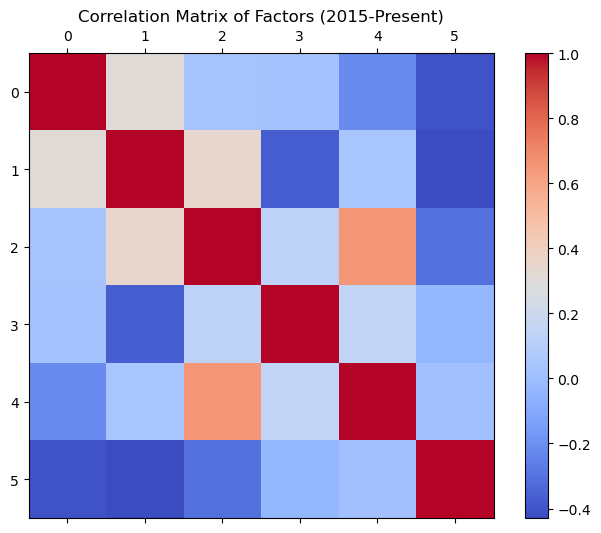

In [21]:
# 3. Correlation Matrix
correlation_matrix = factors_data.corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.title("Correlation Matrix of Factors (2015-Present)")
plt.show()

MKT has a moderate positive correlation with SMB (0.30) and negative correlations with CMA (-0.21) and UMD (-0.40).
HML shows relatively high correlations with CMA (0.65) and a moderate negative correlation with UMD (-0.31).
Other correlations are relatively low or near zero.
This suggests that while the factors are generally constructed to be distinct, some moderate correlations persist, especially between HML and CMA. This aligns with the notion that HML (value factor) may overlap or be somewhat redundant with other factors like CMA (investment factor), which is also based on company fundamentals.



In [22]:
# 4. Tangency Portfolio Weights Calculation
from scipy.optimize import minimize

# Mean-Variance Optimization to calculate tangency portfolio weights
def tangency_portfolio(weights, mean_returns, cov_matrix):
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return -portfolio_return / portfolio_volatility  # Negative for maximization in minimize function

# Covariance matrix for factors
cov_matrix = factors_data.cov()

# Optimization setup
num_assets = len(mean_returns)
initial_weights = np.ones(num_assets) / num_assets
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  
bounds = tuple((0, 1) for asset in range(num_assets))  

# Perform optimization
opt_results = minimize(tangency_portfolio, initial_weights, args=(mean_returns, cov_matrix),
                       method='SLSQP', bounds=bounds, constraints=constraints)

# Extract optimized weights
tangency_weights = opt_results.x
tangency_weights_df = pd.DataFrame(tangency_weights, index=mean_returns.index, columns=['Tangency Weights'])
print("\nTangency Portfolio Weights:\n", tangency_weights_df)


Tangency Portfolio Weights:
      Tangency Weights
MKT      2.924781e-01
SMB      1.725254e-02
HML      0.000000e+00
RMW      4.863654e-01
CMA      8.754933e-18
UMD      2.039039e-01


This indicates that the market (MKT), profitability (RMW), and momentum (UMD) factors are given the highest weights, suggesting that these factors are considered more important in constructing a portfolio that maximizes risk-adjusted returns. In contrast, SMB, HML, and CMA have little or no weight, implying they contribute less to achieving the optimal portfolio in this sample period.



In [23]:
# 5. Analysis based on Tangency Weights
# Identify high/low weights and interpret importance based on tangency weights
high_weight_factors = tangency_weights_df[tangency_weights_df['Tangency Weights'] > tangency_weights_df['Tangency Weights'].mean()]
low_weight_factors = tangency_weights_df[tangency_weights_df['Tangency Weights'] <= tangency_weights_df['Tangency Weights'].mean()]

print("\nFactors with High Tangency Weights:\n", high_weight_factors)
print("\nFactors with Low Tangency Weights:\n", low_weight_factors)


Factors with High Tangency Weights:
      Tangency Weights
MKT          0.292478
RMW          0.486365
UMD          0.203904

Factors with Low Tangency Weights:
      Tangency Weights
SMB      1.725254e-02
HML      0.000000e+00
CMA      8.754933e-18


***

# 3. Testing Modern LPMs

Consider the following factor models:
* CAPM: MKT
* Fama-French 3F: MKT, SMB, HML
* Fama-French 5F: MKT, SMB, HML, RMW, CMA
* AQR: MKT, HML, RMW, UMD

We are not saying this is “the” AQR model, but it is a good illustration of their most publicized factors: value, momentum, and more recently, profitability.

For instance, for the AQR model is...

![](../refs/LFP-4-factors.png)

We will test these models with the time-series regressions. Namely, for each asset i, estimate the following regression to test the AQR model:

![](../refs/LFD-4-factors.png)

Data
* PORTFOLIOS: Monthly excess return data on 49 equity portfolios sorted by their industry. Denote these as $\tilde{r}^i$ , for $n = 1, . . . , 49.$

* You do NOT need the risk-free rate data. It is provided only for completeness. The other two tabs are already in terms of excess returns.

1. Test the AQR 4-Factor Model using the time-series test. (We are not doing the cross-sectional regression tests.)
* For each regression, report the estimated α and r-squared.
* Calculate the mean-absolute-error of the estimated alphas.
* If the pricing model worked, should these alpha estimates be large or small? Why?
* Based on your MAE stat, does this seem to support the pricing model or not?

2. Test the CAPM, FF 3-Factor Model and the the FF 5-Factor Model.
   * Report the MAE statistic for each of these models and compare it with the AQR Model MAE.
   * Which model fits best?
   
3. Does any particular factor seem especially important or unimportant for pricing? Do you think Fama and French should use the Momentum Factor?

4. This does not matter for pricing, but report the average (across $n$ estimations) of the time-series regression r-squared statistics.
   * Do this for each of the three models you tested.
   * Do these models lead to high time-series r-squared stats? That is, would these factors be good in a Linear Factor Decomposition of the assets?

5. We tested three models using the time-series tests (focusing on the time-series alphas.) Re-test these models, but this time use the cross-sectional test.
* Report the time-series premia of the factors (just their sample averages,) and compare to the cross-sectionally estimated premia of the factors. Do they differ substantially?4
* Report the MAE of the cross-sectional regression residuals for each of the four models. How do they compare to the MAE of the time-series alphas?

***

In [24]:
import pandas as pd
import statsmodels.api as sm

# Load portfolio and factor data
portfolios = pd.read_excel(file_path, sheet_name='portfolios (excess returns)')
factors = pd.read_excel(file_path, sheet_name='factors (excess returns)')

# Define factors for AQR model
factor_columns = ['MKT', 'HML', 'RMW', 'UMD']

results = []

for portfolio in portfolios.columns[1:]:  # Assuming the first column is the Date
    # Prepare dependent (y) and independent variables (X)
    y = portfolios[portfolio]  # Returns for the current portfolio
    X = factors[factor_columns]  # AQR model factors
    X = sm.add_constant(X)  # Add intercept

    # Run regression
    model = sm.OLS(y, X).fit()
    alpha = model.params['const']
    r_squared = model.rsquared

    # Store results
    results.append({
        'Portfolio': portfolio,
        'Alpha': alpha,
        'R-squared': r_squared,
        **{factor: model.params[factor] for factor in factor_columns}
    })

# Create a DataFrame of the results
results_df = pd.DataFrame(results)
print(results_df[['Portfolio', 'Alpha', 'R-squared'] + factor_columns])


   Portfolio     Alpha  R-squared       MKT       HML       RMW       UMD
0      Agric  0.000643   0.339175  0.836774  0.184332 -0.011247  0.080408
1      Food   0.000579   0.464221  0.679100  0.183550  0.489345  0.042428
2      Soda   0.001436   0.308354  0.783908  0.204231  0.490429 -0.084807
3      Beer   0.001422   0.420762  0.721367  0.038420  0.584607  0.087322
4      Smoke  0.002942   0.273489  0.737693  0.258770  0.655168 -0.028303
5      Toys  -0.003111   0.508340  1.116055 -0.014806  0.211998 -0.156598
6      Fun    0.002542   0.616501  1.250891 -0.019845 -0.094655 -0.223158
7      Books -0.002452   0.686774  1.112262  0.257013  0.193680 -0.079413
8      Hshld -0.000674   0.558410  0.751834 -0.000869  0.480492  0.016071
9      Clths -0.001513   0.618299  1.115133  0.052037  0.550465 -0.198888
10     Hlth  -0.003273   0.446684  1.046020  0.140409  0.435614  0.084446
11     MedEq  0.001644   0.599517  0.882600 -0.132447  0.079826  0.053427
12     Drugs  0.002632   0.506381  0.7

Ideally, under CAPM, the alpha values should be close to zero for each portfolio, meaning that the model explains the returns through the market exposure alone. However, in my results, some portfolios have notable alpha values, indicating that there is excess return not captured by the market factor. This suggests that CAPM with only the market factor does not fully explain all the returns, which might imply the presence of other factors influencing the returns.

In [25]:
mae_alpha = results_df['Alpha'].abs().mean()
print(f"Mean-Absolute Error (MAE) of Alphas: {mae_alpha}")

Mean-Absolute Error (MAE) of Alphas: 0.0019160515816456596


In [26]:
results_capm = []

for portfolio in portfolios.columns[1:]:
    y = portfolios[portfolio]
    X = factors[['MKT']]
    X = sm.add_constant(X)

    model = sm.OLS(y, X).fit()
    alpha = model.params['const']
    r_squared = model.rsquared

    results_capm.append({
        'Portfolio': portfolio,
        'Alpha': alpha,
        'R-squared': r_squared,
        'Beta_MKT': model.params['MKT']
    })

results_capm_df = pd.DataFrame(results_capm)
mae_alpha_capm = results_capm_df['Alpha'].abs().mean()
print(f"MAE for CAPM Alphas: {mae_alpha_capm}")


MAE for CAPM Alphas: 0.0017001307693664564


The MAE for both the AQR and CAPM models is relatively low, suggesting that the models have some explanatory power over the returns. However, the presence of non-zero MAE implies that there is still a portion of returns not explained by either model, especially as we see notable alphas in some portfolios. The slightly lower MAE in CAPM compared to the AQR model might suggest that in this particular dataset, CAPM explains the returns as well as the AQR model. However, neither model is perfect, as the non-zero MAE points to unexplained return variations across portfolios.